In [ ]:
TRANSFORMAR_A_LOG = True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    %tensorflow_version 1.x

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1YywrCBe6XS-91aSksw5T0QnHVQB-qJey'})#https://drive.google.com/file/d/1YywrCBe6XS-91aSksw5T0QnHVQB-qJey/view?usp=sharing
myfile.GetContentFile('./TFM.csv')

In [ ]:
# Paquetes de manipulación de datos y creación de gráficos
%matplotlib inline
import pandas as pd 
import numpy as np
import scipy # librería multipack
import os

# Paquetes de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# visualización
import plotly.offline    as py
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm             import SVC
from sklearn.metrics         import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline      import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

from IPython.display import display

from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df=pd.read_csv('./TFM.csv', delimiter=",")
df = df.drop(['Unnamed: 0'], axis=1)

Diastilic pressure is higher than systolic one in 0 cases


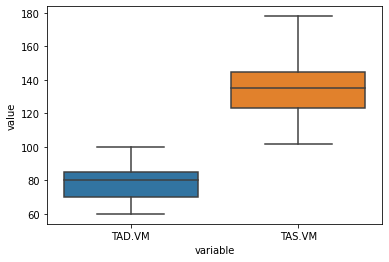

In [ ]:
df.drop(df[(df['TAS.VM'] > df['TAS.VM'].quantile(0.975)) | (df['TAS.VM'] < df['TAS.VM'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['TAD.VM'] > df['TAD.VM'].quantile(0.975)) | (df['TAD.VM'] < df['TAD.VM'].quantile(0.025))].index,inplace=True)
blood_pressure = df.loc[:,['TAD.VM','TAS.VM']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['TAD.VM']> df['TAS.VM']].shape[0]))

In [ ]:
X = df.drop(['mortality.cat'],axis=1)
y = df['mortality.cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

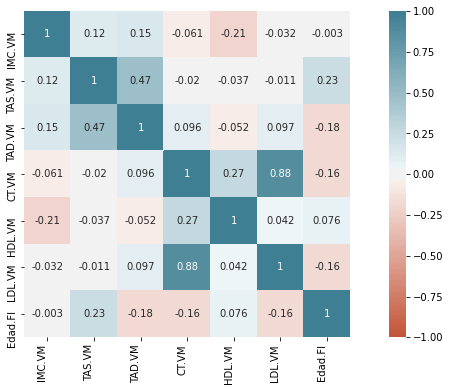

In [ ]:
correlation = df.loc[:,['IMC.VM', 'TAS.VM', 'TAD.VM', 'CT.VM', 'HDL.VM', 'LDL.VM', 'Edad.FI']]
corr = correlation.corr()
plt.subplots(figsize=(14, 6))
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

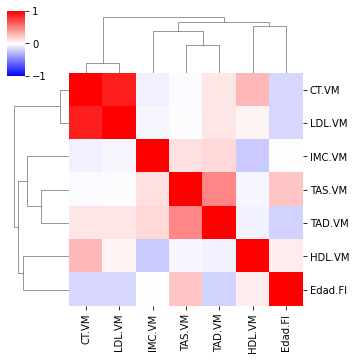

In [ ]:
sns.clustermap(corr, cmap="bwr", vmin=-1, vmax=1, figsize=(5,5));

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from sklearn.metrics import average_precision_score, log_loss
from copy import deepcopy

def train_nnet(X_tr, y_tr, X_val, y_val,
               n_repetitions=10, n_epochs=20,
               hidden_layer_sizes=(100,)):
    
    LOG_LOSS = False
    if LOG_LOSS:
        best_val = 1e40
    else:
        best_val = -1e40
    for seed in range(1,1+n_repetitions):
        print("Repetición", seed, "...")
        clf=MLPClassifier(verbose=10, random_state=seed, tol=1e-20,
                          hidden_layer_sizes=hidden_layer_sizes,
                          validation_fraction=0, max_iter=1,
                          early_stopping=False, warm_start=True)
        for e in range(n_epochs):
            clf.fit(X_tr, y_tr)
            if LOG_LOSS:
                s = log_loss(y_val, clf.predict_proba(X_val))
            else:
                s = average_precision_score(y_val, clf.predict_proba(X_val)[:,1])
            if LOG_LOSS:
                es_mejor = s < best_val
            else:
                es_mejor = s > best_val
            
            if es_mejor:
                best_val = s
                best_coefs = deepcopy(clf.coefs_)
                if LOG_LOSS:
                    print("Logloss_val=", s.round(8), ",", "weights kept")
                else:
                    print("Score_val=", s.round(8), ",", "weights kept")
        clf.coefs_ = best_coefs
    
    return clf

In [ ]:
#logreg=LogisticRegression(C=0.001,penalty='l2', random_state=21)
LR=LogisticRegression()
XGBoost=XGBClassifier(colsample_bytree= 0.6, gamma= 1.5, max_depth= 4, min_child_weight= 10, subsample= 0.6, random_state=21)
DT=DecisionTreeClassifier(max_depth=8, random_state=21)
#rf=RandomForestClassifier(criterion= "entropy", max_depth= 7, max_features= "auto",
#                          n_estimators= 5, random_state=21)
RF=RandomForestClassifier(criterion= "gini", max_depth= 7+3, max_features= None,
                          n_estimators= 501, random_state=21)
SVM=SVC(C=1,gamma=0.001, kernel='rbf',random_state=21, probability=True)
#mlp=MLPClassifier(alpha=0.000001, random_state=21)
MLP=MLPClassifier(random_state=21, max_iter=2000, hidden_layer_sizes=(2,),
                  early_stopping=True, validation_fraction=0.2)
GNB=GaussianNB()

In [ ]:
smote = SMOTE(random_state=21)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
len(y_smote), len(y_train), y_smote.mean(), y_train.mean()

(79502, 40452, 0.5, 0.017329180263027787)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rand = RandomUnderSampler(random_state=21)
X_rand, y_rand = rand.fit_resample(X_train_scaled, y_train)

In [ ]:
len(y_rand), len(y_train), y_rand.mean(), y_train.mean()

(1402, 40452, 0.5, 0.017329180263027787)

In [ ]:
models=[LR,XGBoost,DT,RF,SVM,MLP,GNB]

In [ ]:
models = [{'label':'LR', 'model':LR},
          
          {'label':'XGBoost', 'model': XGBoost},
          
          {'label':'DT','model':DT},
          
          {'label':'RF', 'model':RF},
          
          {'label':'SVM', 'model':SVM},
          
          {'label':'MLP', 'model': MLP},
          
          {'label':'GNB', 'model':GNB}]

Entrenando modelo LR ...
Entrenando modelo XGBoost ...
Entrenando modelo DT ...
Entrenando modelo RF ...
Entrenando modelo SVM ...
Entrenando modelo MLP ...
Entrenando modelo GNB ...


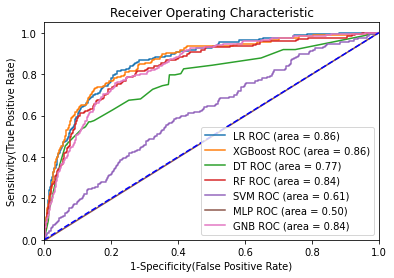

In [ ]:
plt.figure()
# Below for loop iterates through your models list
for m in models:
    print("Entrenando modelo", m["label"], "...")
    model = m['model'] # select the model
    if m['label'] == "mlp":
        nva = int(0.3*len(X_train_scaled))
        m["model"] = train_nnet(X_train_scaled[:-nva], y_train[:-nva],
                                X_train_scaled[-nva:], y_train[-nva:],
                                n_repetitions=5, n_epochs=200,
                                hidden_layer_sizes=(10,))
        model = m["model"]
    else:
        model.fit(X_train_scaled, y_train) # train the model
    #model.fit(X_smote, y_smote) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
y_test.mean()

0.01700781172747948

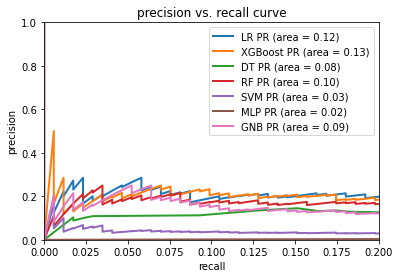

In [ ]:
# precision recall curve

for m in models:
    model = m['model']
    # La siguiente línea no hace falta, ya están entrenados
    # model.fit(X_train_scaled, y_train) # train the model 
    y_pred=model.predict_proba(X_test_scaled)
    precision, recall, thresholds = precision_recall_curve(y_test.values,y_pred[:, 1])
    average_precision = average_precision_score(y_test.values, y_pred[:, 1])
    plt.plot(recall, precision, lw=2, label='%s PR (area = %0.2f)' % (m['label'], average_precision))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.axis([0,.2,0,1])
plt.show()

Accuracy :  0.9829921882725206
Sensitivity :  1.0
Specificity :  0.0
Confusion matrix for label LR:


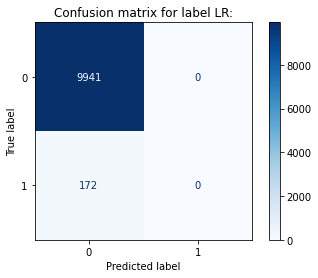

Accuracy :  0.9828933056461979
Sensitivity :  0.9998994064983402
Specificity :  0.0
Confusion matrix for label XGBoost:


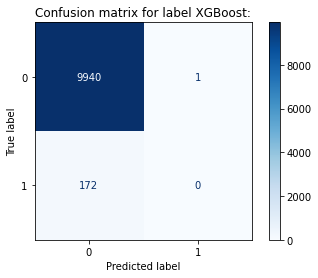

Accuracy :  0.9807178878671018
Sensitivity :  0.9973845689568454
Specificity :  0.01744186046511628
Confusion matrix for label DT:


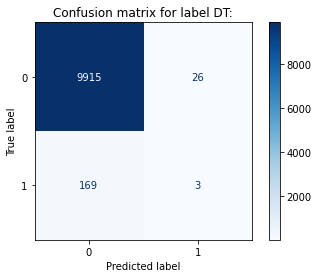

Accuracy :  0.9825966577672303
Sensitivity :  0.9995976259933609
Specificity :  0.0
Confusion matrix for label RF:


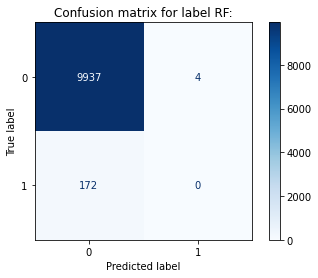

Accuracy :  0.9829921882725206
Sensitivity :  1.0
Specificity :  0.0
Confusion matrix for label SVM:


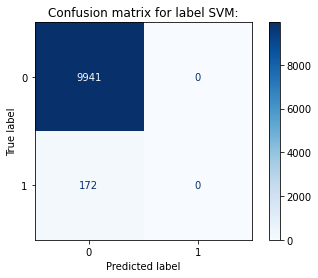

Accuracy :  0.9829921882725206
Sensitivity :  1.0
Specificity :  0.0
Confusion matrix for label MLP:


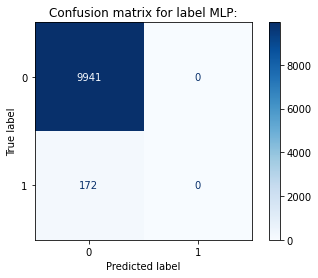

Accuracy :  0.9777514090774251
Sensitivity :  0.9931596418871341
Specificity :  0.0872093023255814
Confusion matrix for label GNB:


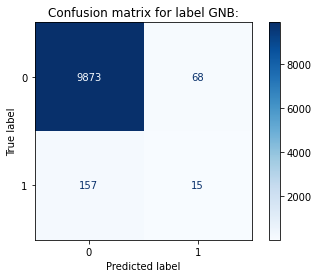

In [ ]:
from sklearn.metrics import plot_confusion_matrix

for m in models:
    model = m['model']
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    total1=sum(sum(cm))
    Accuracy=(cm[0,0]+cm[1,1])/total1
    print ('Accuracy : ', Accuracy)
    Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', Sensitivity )
    Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', Specificity)
    plot_confusion_matrix(model,X_test_scaled, y_test, cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion matrix for label {}:".format(m['label']))
    print("Confusion matrix for label {}:".format(m['label']))
    plt.show()

In [ ]:
pipeline_lr= Pipeline([('sampling', smote), ('class', LR)])
pipeline_xgb=Pipeline([('sampling', smote), ('class', XGBoost)])
pipeline_dsc=Pipeline([('sampling', smote), ('class', DT)])
pipeline_rf=Pipeline([('sampling', smote), ('class', RF)])
pipeline_svm=Pipeline([('sampling', smote), ('class', SVM)])
pipeline_mlp=Pipeline([('sampling', smote), ('class', MLP)])
pipeline_gnb=Pipeline([('sampling', smote), ('class', GNB)])

In [ ]:
model=[pipeline_lr,pipeline_xgb,pipeline_dsc,pipeline_rf,pipeline_svm,pipeline_mlp,pipeline_gnb]

In [ ]:
models = [{'label':'LR', 'model':pipeline_lr},
          
          {'label':'XGBoost', 'model': pipeline_xgb},
          
          {'label':'DT','model':pipeline_dsc},
          
          {'label':'RF', 'model':pipeline_rf},
          
          {'label':'SVM', 'model':pipeline_svm},
          
          {'label':'MLP', 'model': pipeline_mlp},
          
          {'label':'GNB', 'model':pipeline_gnb}]

Entrenando modelo LR ...
Entrenando modelo XGBoost ...
Entrenando modelo DT ...
Entrenando modelo RF ...
Entrenando modelo SVM ...
Entrenando modelo MLP ...
Entrenando modelo GNB ...


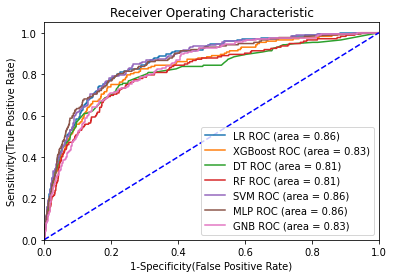

In [ ]:
plt.figure()
# Below for loop iterates through your models list
for m in models:
    print("Entrenando modelo", m["label"], "...")
    model = m['model'] # select the model
    if m['label'] == "mlp":
        nva = int(0.3*len(X_train_scaled))
        m["model"] = train_nnet(X_train_scaled[:-nva], y_train[:-nva],
                                X_train_scaled[-nva:], y_train[-nva:],
                                n_repetitions=5, n_epochs=200,
                                hidden_layer_sizes=(10,))
        model = m["model"]
    else:
        model.fit(X_train_scaled, y_train) # train the model
    #model.fit(X_smote, y_smote) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

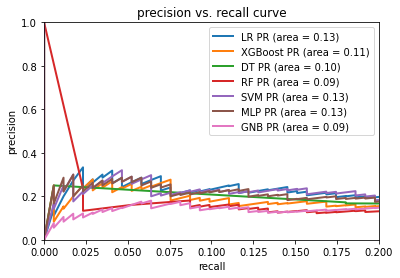

In [ ]:
for m in models:
    model = m['model']
    # La siguiente línea no hace falta, ya están entrenados
    # model.fit(X_train_scaled, y_train) # train the model 
    y_pred=model.predict_proba(X_test_scaled)
    precision, recall, thresholds = precision_recall_curve(y_test.values,y_pred[:, 1])
    average_precision = average_precision_score(y_test.values, y_pred[:, 1])
    plt.plot(recall, precision, lw=2, label='%s PR (area = %0.2f)' % (m['label'], average_precision))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.axis([0,.2,0,1])
plt.show()

Accuracy :  0.7636705230890932
Sensitivity :  0.7629011165878684
Specificity :  0.8081395348837209
Confusion matrix for label LR:


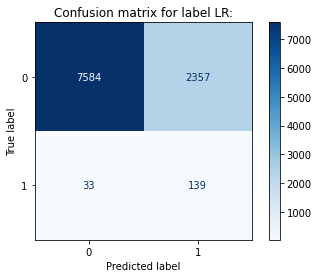

Accuracy :  0.9281123306635024
Sensitivity :  0.9365255004526708
Specificity :  0.4418604651162791
Confusion matrix for label XGBoost:


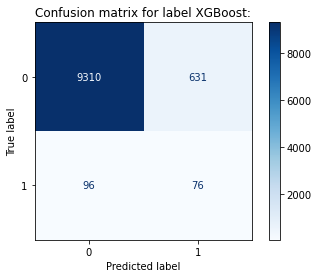

Accuracy :  0.7836448136062494
Sensitivity :  0.7847299064480434
Specificity :  0.7209302325581395
Confusion matrix for label DT:


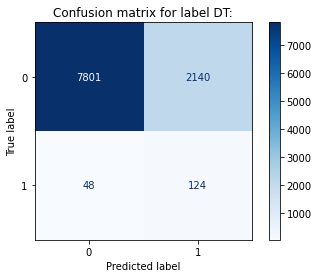

Accuracy :  0.8585978443587462
Sensitivity :  0.8636958052509808
Specificity :  0.563953488372093
Confusion matrix for label RF:


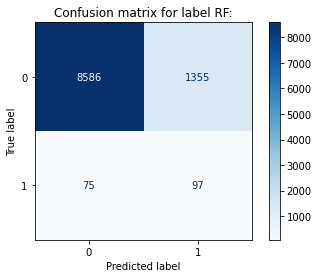

Accuracy :  0.7710867200632849
Sensitivity :  0.7706468162156724
Specificity :  0.7965116279069767
Confusion matrix for label SVM:


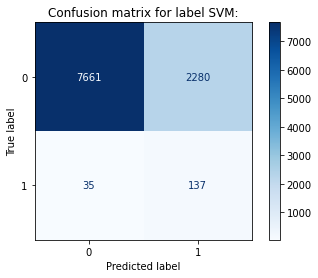

Accuracy :  0.8075744091763077
Sensitivity :  0.8082687858364349
Specificity :  0.7674418604651163
Confusion matrix for label MLP:


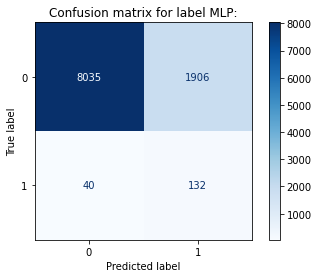

Accuracy :  0.747058241866904
Sensitivity :  0.7471079368272809
Specificity :  0.7441860465116279
Confusion matrix for label GNB:


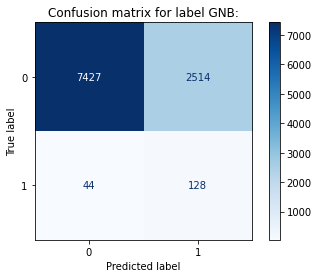

In [ ]:
from sklearn.metrics import plot_confusion_matrix

for m in models:
    model = m['model']
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    total1=sum(sum(cm))
    Accuracy=(cm[0,0]+cm[1,1])/total1
    print ('Accuracy : ', Accuracy)
    Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', Sensitivity )
    Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', Specificity)
    plot_confusion_matrix(model,X_test_scaled, y_test, cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion matrix for label {}:".format(m['label']))
    print("Confusion matrix for label {}:".format(m['label']))
    plt.show()

In [ ]:
pipeline_lr= Pipeline([('sampling', rand), ('class', LR)])
pipeline_xgb=Pipeline([('sampling', rand), ('class', XGBoost)])
pipeline_dsc=Pipeline([('sampling', rand), ('class', DT)])
pipeline_rf=Pipeline([('sampling', rand), ('class', RF)])
pipeline_svm=Pipeline([('sampling', rand), ('class', SVM)])
pipeline_mlp=Pipeline([('sampling', rand), ('class', MLP)])
pipeline_gnb=Pipeline([('sampling', rand), ('class', GNB)])

In [ ]:
model=[pipeline_lr,pipeline_xgb,pipeline_dsc,pipeline_rf,pipeline_svm,pipeline_mlp,pipeline_gnb]

In [ ]:
models = [{'label':'LR', 'model':pipeline_lr},
          
          {'label':'XGBoost', 'model': pipeline_xgb},
          
          {'label':'DT','model':pipeline_dsc},
          
          {'label':'RF', 'model':pipeline_rf},
          
          {'label':'SVM', 'model':pipeline_svm},
          
          {'label':'MLP', 'model': pipeline_mlp},
          
          {'label':'GNB', 'model':pipeline_gnb}]

Entrenando modelo LR ...
Entrenando modelo XGBoost ...
Entrenando modelo DT ...
Entrenando modelo RF ...
Entrenando modelo SVM ...
Entrenando modelo MLP ...
Entrenando modelo GNB ...


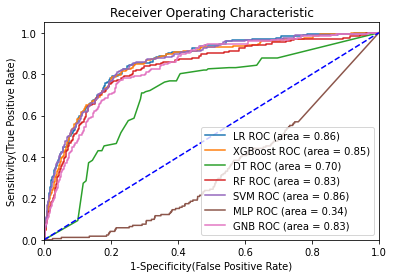

In [ ]:
plt.figure()
# Below for loop iterates through your models list
for m in models:
    print("Entrenando modelo", m["label"], "...")
    model = m['model'] # select the model
    if m['label'] == "mlp":
        nva = int(0.3*len(X_train_scaled))
        m["model"] = train_nnet(X_train_scaled[:-nva], y_train[:-nva],
                                X_train_scaled[-nva:], y_train[-nva:],
                                n_repetitions=5, n_epochs=200,
                                hidden_layer_sizes=(10,))
        model = m["model"]
    else:
        model.fit(X_train_scaled, y_train) # train the model
    #model.fit(X_smote, y_smote) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_scaled)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

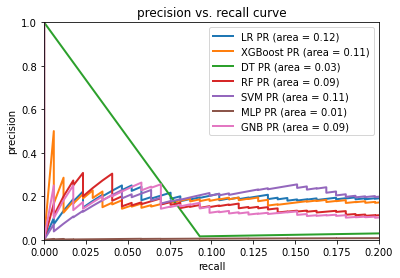

In [ ]:
for m in models:
    model = m['model']
    # La siguiente línea no hace falta, ya están entrenados
    # model.fit(X_train_scaled, y_train) # train the model 
    y_pred=model.predict_proba(X_test_scaled)
    precision, recall, thresholds = precision_recall_curve(y_test.values,y_pred[:, 1])
    average_precision = average_precision_score(y_test.values, y_pred[:, 1])
    plt.plot(recall, precision, lw=2, label='%s PR (area = %0.2f)' % (m['label'], average_precision))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.axis([0,.2,0,1])
plt.show()

Accuracy :  0.7517057253040641
Sensitivity :  0.7502263353787345
Specificity :  0.8372093023255814
Confusion matrix for label LR:


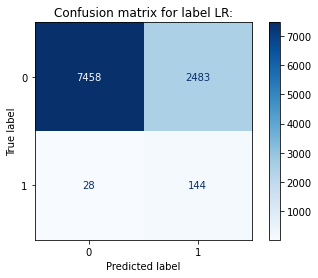

Accuracy :  0.7593196875309008
Sensitivity :  0.7583744090131778
Specificity :  0.813953488372093
Confusion matrix for label XGBoost:


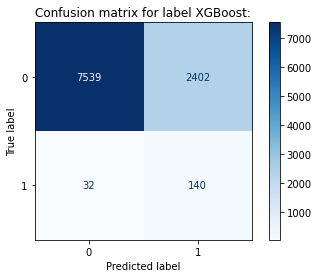

Accuracy :  0.6974191634529813
Sensitivity :  0.697112966502364
Specificity :  0.7151162790697675
Confusion matrix for label DT:


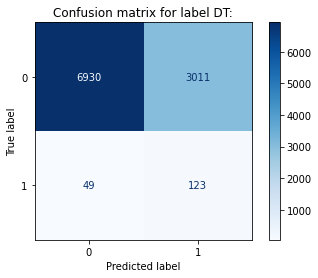

Accuracy :  0.7395431622663898
Sensitivity :  0.7385574891861986
Specificity :  0.7965116279069767
Confusion matrix for label RF:


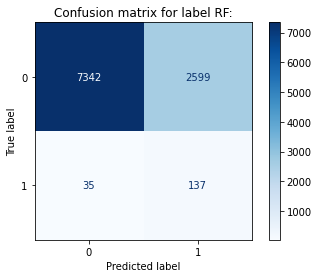

Accuracy :  0.7394442796400672
Sensitivity :  0.7376521476712604
Specificity :  0.8430232558139535
Confusion matrix for label SVM:


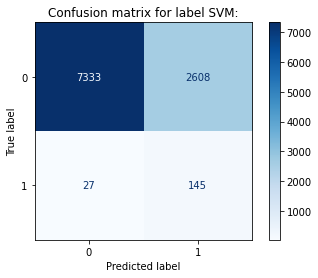

Accuracy :  0.01700781172747948
Sensitivity :  0.0
Specificity :  1.0
Confusion matrix for label MLP:


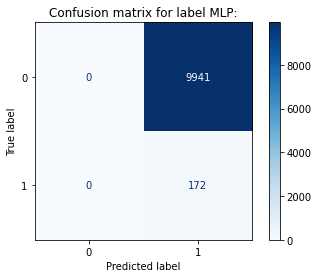

Accuracy :  0.7382576881241966
Sensitivity :  0.7374509606679408
Specificity :  0.7848837209302325
Confusion matrix for label GNB:


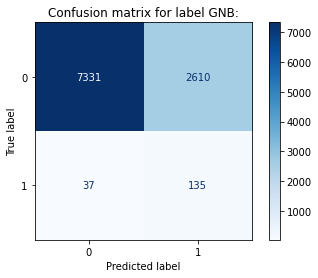

In [ ]:
from sklearn.metrics import plot_confusion_matrix

for m in models:
    model = m['model']
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    total1=sum(sum(cm))
    Accuracy=(cm[0,0]+cm[1,1])/total1
    print ('Accuracy : ', Accuracy)
    Sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', Sensitivity )
    Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', Specificity)
    plot_confusion_matrix(model,X_test_scaled, y_test, cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion matrix for label {}:".format(m['label']))
    print("Confusion matrix for label {}:".format(m['label']))
    plt.show()